In [62]:
from ucimlrepo import fetch_ucirepo 

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Задание 1

## Загрузка датасета

In [63]:
mushroom = fetch_ucirepo(id = 73)  

X = mushroom.data.features 
y = mushroom.data.targets

pd.concat([X, y], axis = 1).head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


## Информация о датасете

In [64]:
# Проверка на отсутствующие значения
print(f'Количество объектов с NaN: {X.isnull().any(axis = 1).sum()}') 

Количество объектов с NaN: 2480


In [65]:
# Удаление объектов с неполными данными
if X.isnull().values.any():
    X = pd.concat([X, y], axis = 1)
    X.dropna(inplace = True)

    y = pd.DataFrame(X['poisonous'])
    X.drop(['poisonous'], axis = 1, inplace = True)

In [66]:
X.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,5644,5644,5644,5644,5644,5644,5644,5644,5644,5644,...,5644,5644,5644,5644,5644,5644,5644,5644,5644,5644
unique,6,4,8,2,7,2,2,2,9,2,...,4,7,7,1,2,3,4,6,6,6
top,x,y,g,t,n,f,c,b,p,t,...,s,w,w,p,w,o,p,n,v,d
freq,2840,2220,1696,3184,2776,5626,4620,4940,1384,2880,...,3544,3136,3088,5644,5636,5488,3488,1920,2160,2492


In [67]:
# Так как признак veil-type содержит только одно значение,
# то этот признак не вносит никакого вклада и его можно отбросить
X.drop(['veil-type'], axis = 1, inplace = True)

In [68]:
y.value_counts()

poisonous
e            3488
p            2156
Name: count, dtype: int64

## Распределение значений категориальных признаков по классам

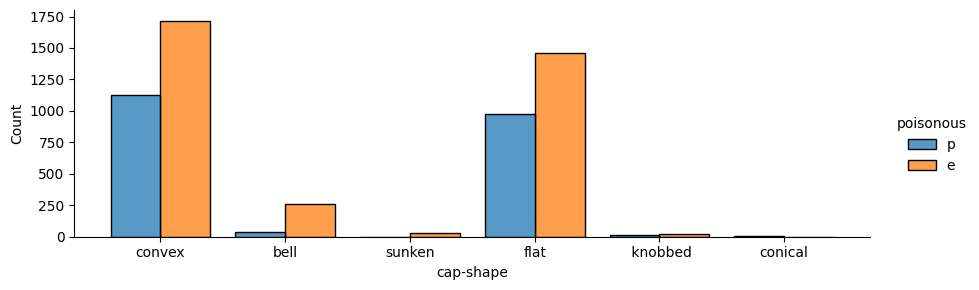

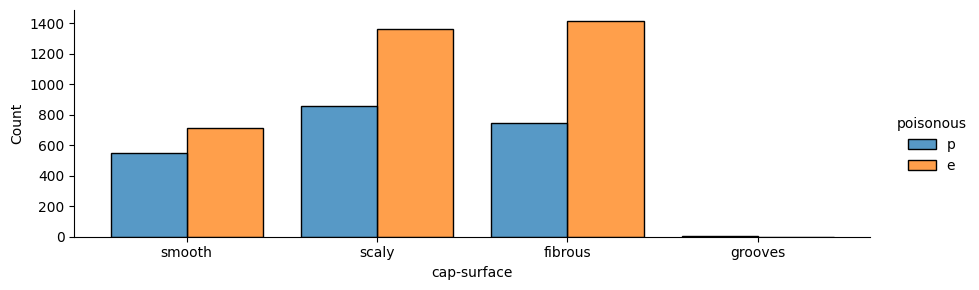

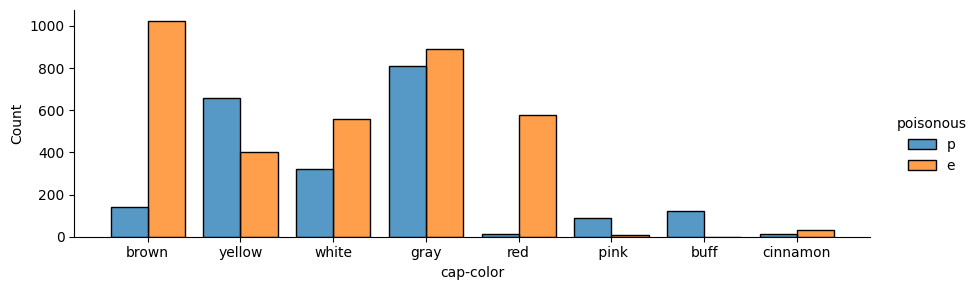

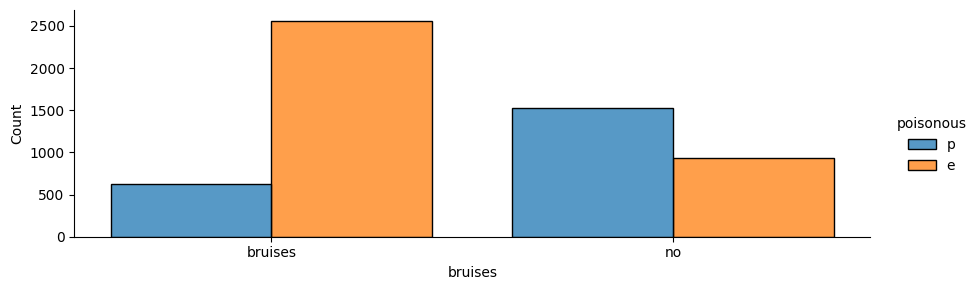

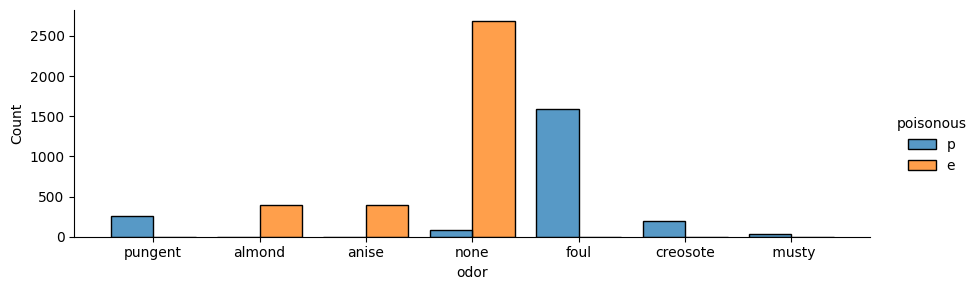

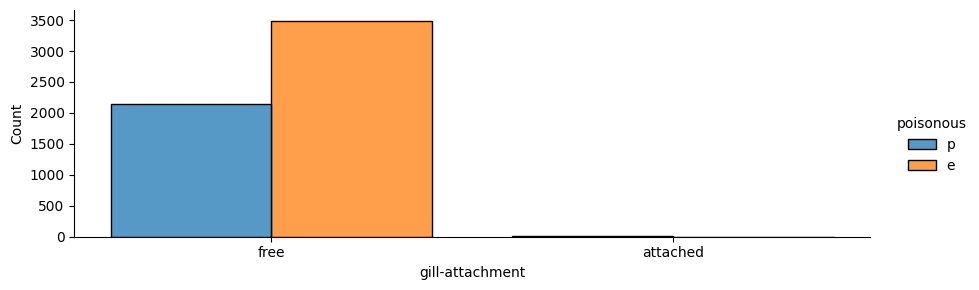

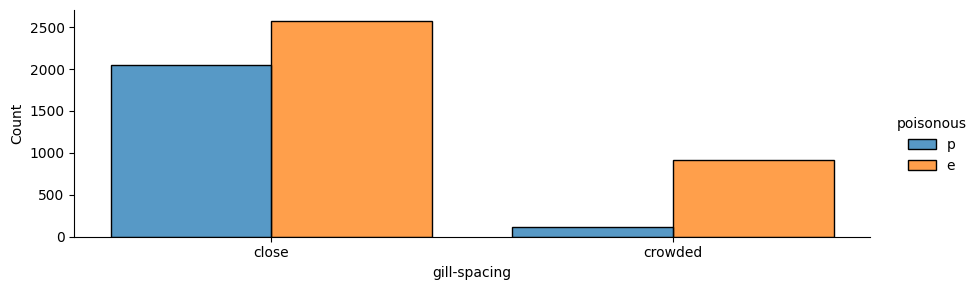

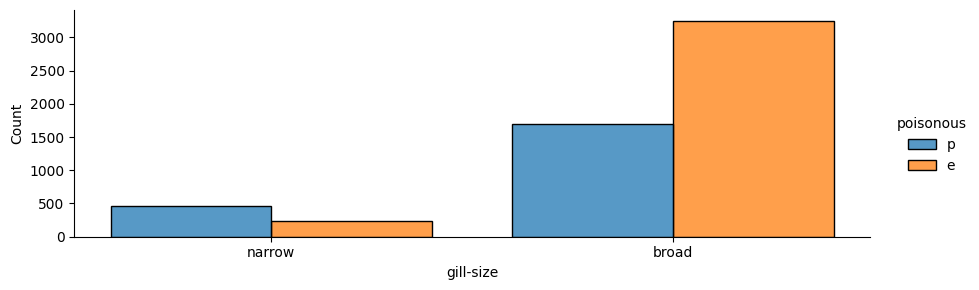

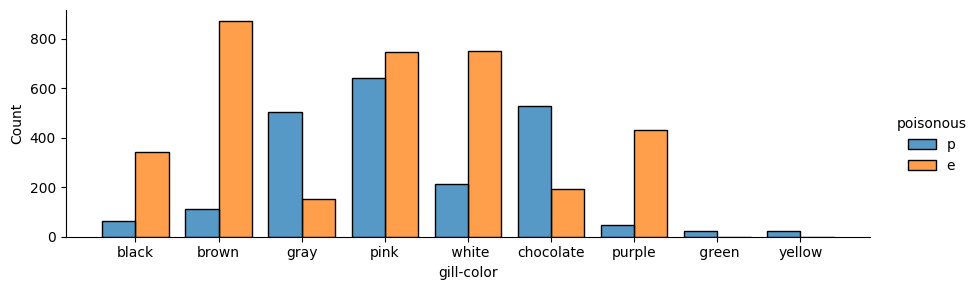

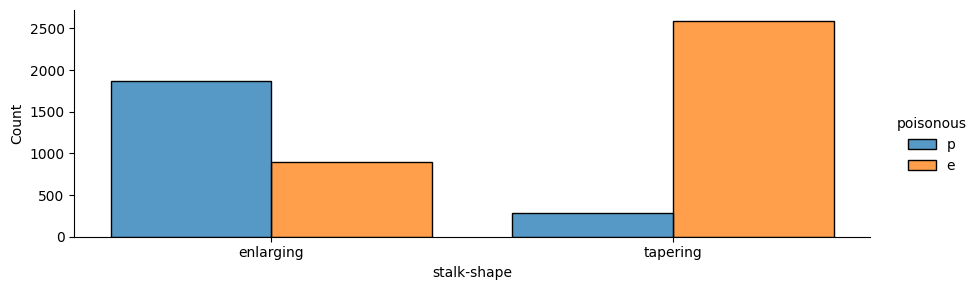

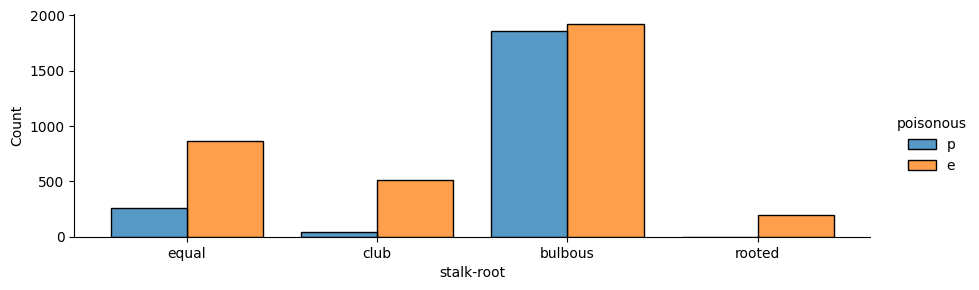

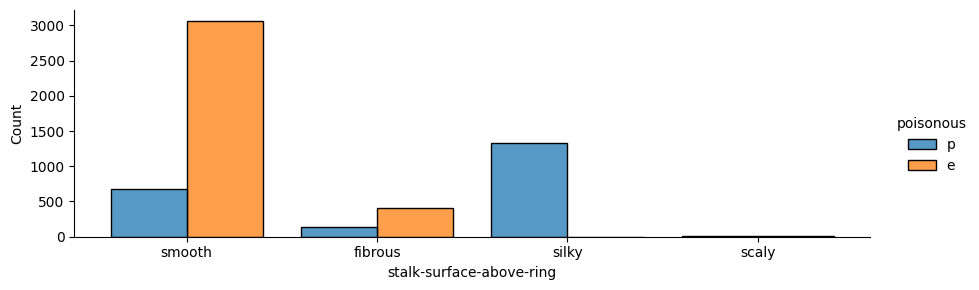

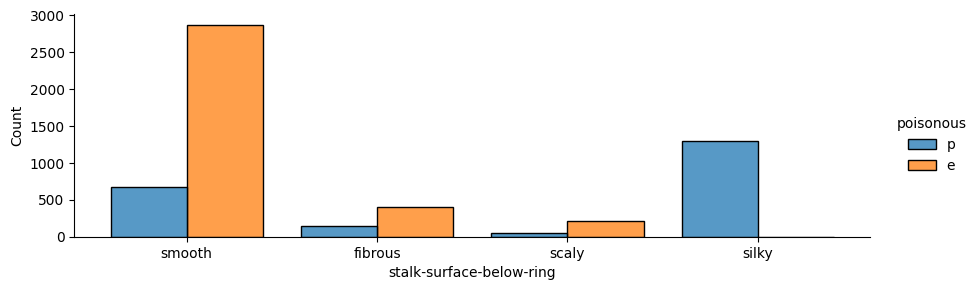

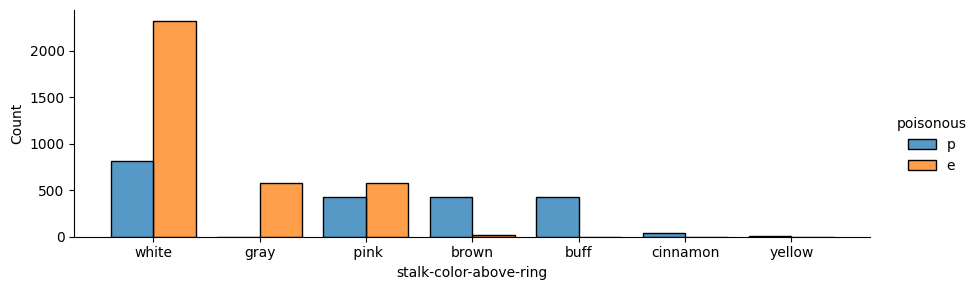

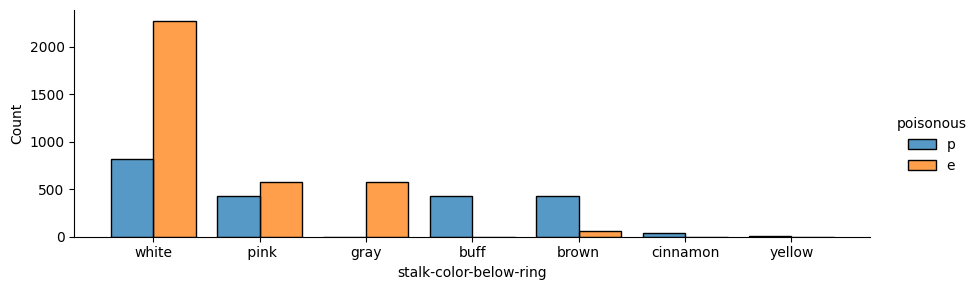

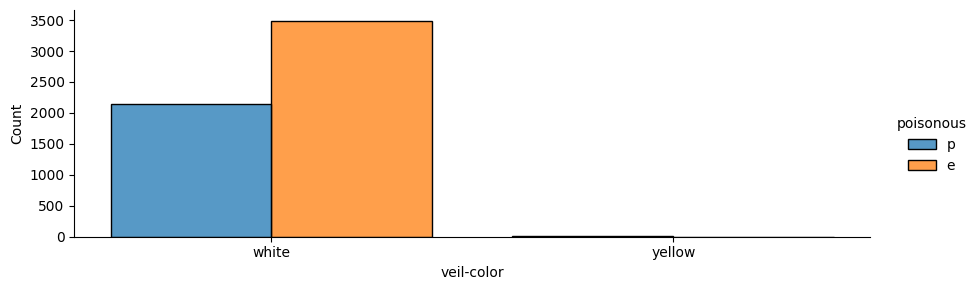

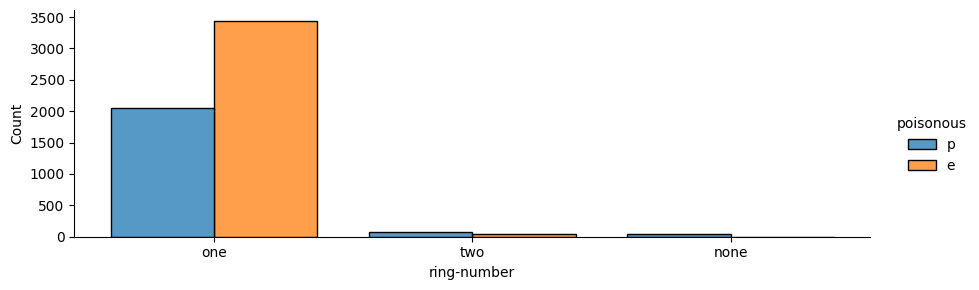

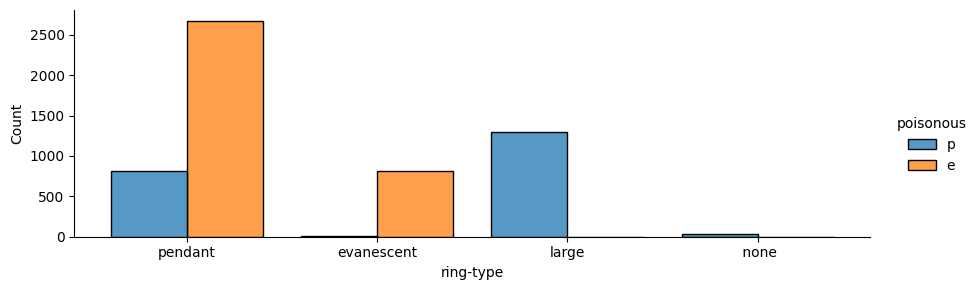

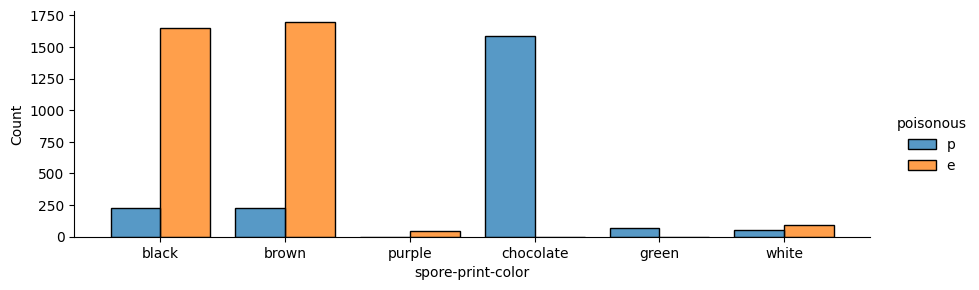

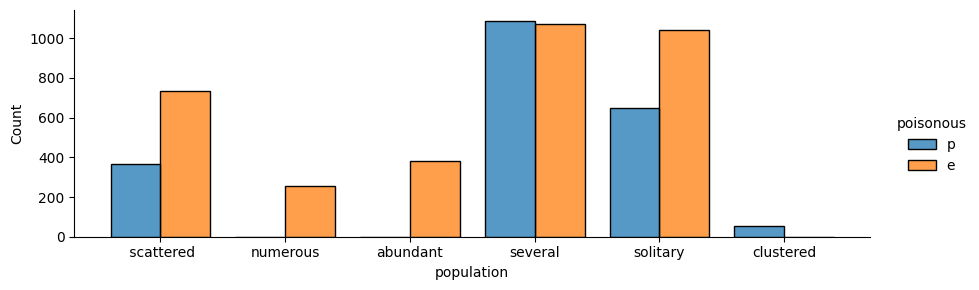

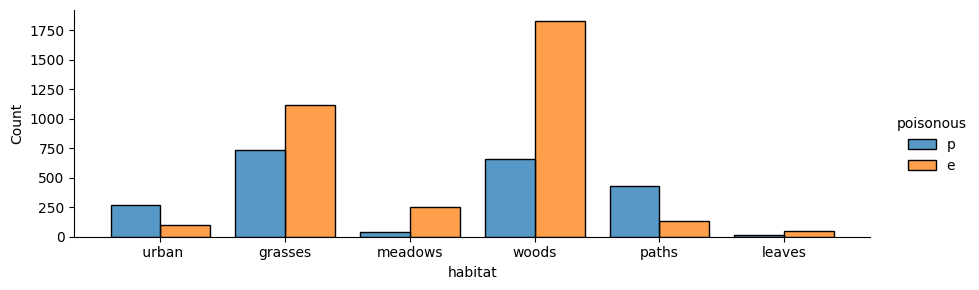

In [69]:
vars = mushroom['variables']
X_full = X

for col_name in X.columns.values:

    # Вывод полных имен признаков
    description = vars.loc[
        vars['name'] == col_name]['description'].values[0].split(',')
        
    for var in description:
        full, abbrev = var.split('=')
        X_full[col_name] = X_full[col_name].replace(abbrev, full)

    sns.displot(X_full, 
                x = col_name, 
                hue = y['poisonous'], 
                multiple = 'dodge', 
                shrink = .8, 
                height = 3, 
                aspect = 3,
                )

# Задание 2

In [ ]:
X_freq = X.apply(lambda col: pd.DataFrame.value_counts(col, normalize = True), axis = 0)